In [26]:
from numpy import linalg as LA
from numpy import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

## Functions

In [27]:
def readData(fileName):
    content = np.asarray([i.split() for i in open(fileName).readlines()], dtype='float')
    points = np.ones(content.shape)
    points[:, 1:] = content[:, :4]
    labels = content[:, 4:].flatten()
    
    return points, labels

def readRandom(fileName):
    content = np.asarray([i.split() for i in open(fileName).readlines()], dtype='float')
    random.shuffle(content)
    points = np.ones(content.shape)
    points[:, 1:] = content[:, :4]
    labels = content[:, 4:].flatten()
    
    return points, labels


## PLA

In [28]:
def pla(points, labels, lr=1):
    weight = np.zeros((points.shape[1]), dtype='float')

    roundNumber = 0
    changed = True
    while(changed):
        changed = False
        for i, point in enumerate(points):
            predict = np.inner(weight, point)
            if(predict*labels[i] <= 0):
                weight = weight + lr*labels[i]*point
                roundNumber += 1
                changed = True
                
    return weight, roundNumber

## Problem 6

40.13587921847247


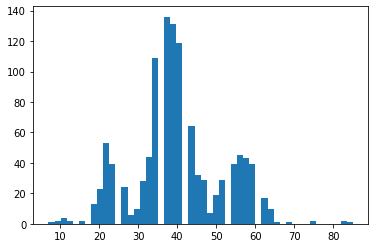

In [21]:
avgRoundNumber = 0
roundNumbers = []
for i in range(0,1126):
    points, labels = readRandom("hw1_6_train.dat.txt")
    weight, roundNumber = pla(points, labels)
    avgRoundNumber += roundNumber
    roundNumbers.append(roundNumber)
    

plt.hist(roundNumbers, bins=50)
plt.savefig('problem_6.png')
print(avgRoundNumber/1126)

## Pocket Algorithm

In [29]:
def pocketAlgo(points, labels, roundTimes=2000, updateTimes=50):
    weight = np.zeros((points.shape[1]), dtype='float')
    bestWeight = np.zeros((points.shape[1]), dtype='float')
    size = points.shape[0]
    miniError = 1
    changedTimes = 1
    
    ## Training
    changed = True
    while(changed):
        changed = False
        for i, point in enumerate(points):
            
            if(changedTimes == updateTimes):
                changed = False
                break
            
            predict = np.inner(weight, point)
            if(predict*labels[i] <= 0):
                weight = weight + labels[i]*point
                changed = True
                changedTimes += 1

                error = 0
                for i, point in enumerate(points):
                    predict = np.inner(weight, point)
                    if(predict*labels[i] <= 0):
                        error += 1

                if(miniError > error/size):
                    miniError = error/size
                    bestWeight = weight    
    
    return bestWeight, weight

def evaluateOnTestingSet(points, labels, weight):
    size = points.shape[0]
    error = 0
    for i, point in enumerate(points):
        predict = np.inner(weight, point)
        if(predict*labels[i] <= 0):
            error += 1
    
    return error/size

## Problem 7

0.13166429840142094


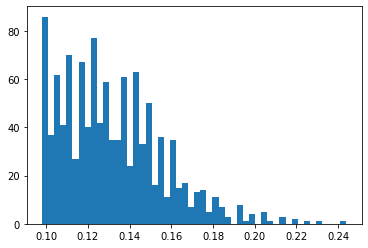

In [23]:
evgTestingError = 0
roundNumbers = []
for _ in range(0,1126):
    ## Training
    points, labels = readRandom("hw1_7_train.dat.txt")
    bestweight, weight = pocketAlgo(points, labels, roundTimes=2000, updateTimes=50)
                

    ## Testing
    points, labels = readRandom("hw1_7_test.dat.txt")
    errorRate = evaluateOnTestingSet(points, labels, weight=bestweight)
    evgTestingError += errorRate
    roundNumbers.append(errorRate) 

plt.hist(roundNumbers, bins=50)
plt.savefig('problem_7.png')
print(evgTestingError/1126)

## Problem 8

0.2616341030195377


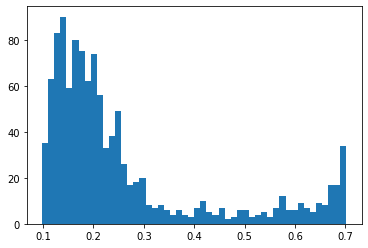

In [30]:
evgTestingError = 0
roundNumbers = []
for _ in range(0,1126):
    ## Training
    points, labels = readRandom("hw1_7_train.dat.txt")
    bestweight, weight = pocketAlgo(points, labels, roundTimes=2000, updateTimes=100)
                

    ## Testing
    points, labels = readRandom("hw1_7_test.dat.txt")
    errorRate = evaluateOnTestingSet(points, labels, weight=weight)
    evgTestingError += errorRate
    roundNumbers.append(errorRate) 

plt.hist(roundNumbers, bins=50)
plt.savefig('problem_8.png')
print(evgTestingError/1126)